<a href="https://colab.research.google.com/github/vyshnavigarapati/Content-distribution-Strategy-of-OTT/blob/main/Content_distribution_strategy_of_OTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_titles.csv")
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
# Convert 'date_added' to datetime (safe mode)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values
df.fillna('Unknown', inplace=True)

# Extract year and month (only after datetime conversion)
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['month_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month


/tmp/ipython-input-1775815917.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


# Content Type Distribution(Tv Shows vs Movies)

/tmp/ipython-input-3593263788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


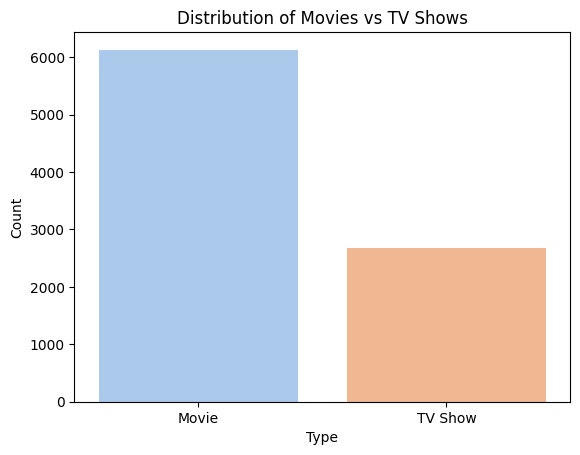

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='pastel')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


# Content Added Per Year

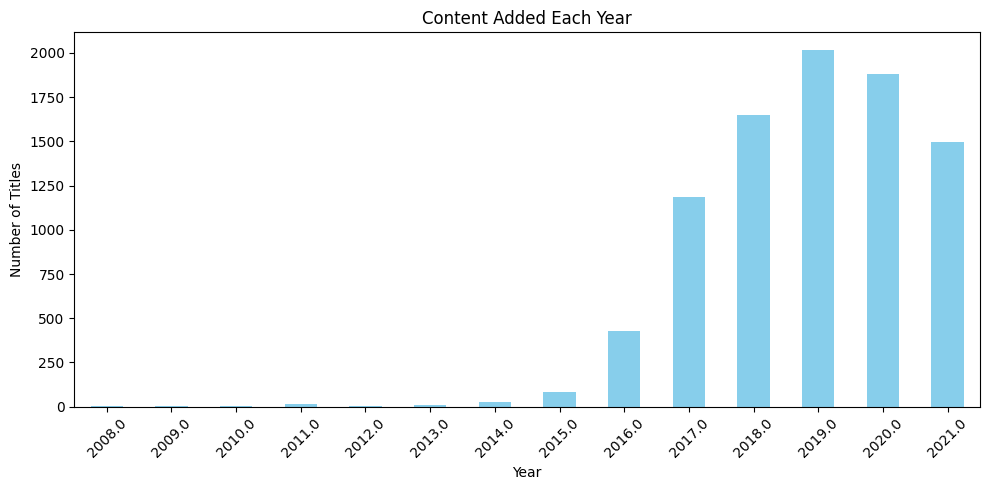

In [ ]:
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Content Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 Countries by Content

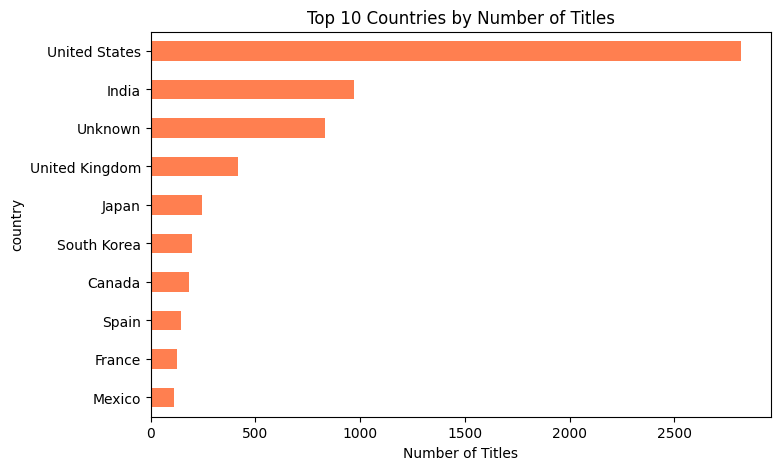

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


# Top Genres(From listed_coloumn)

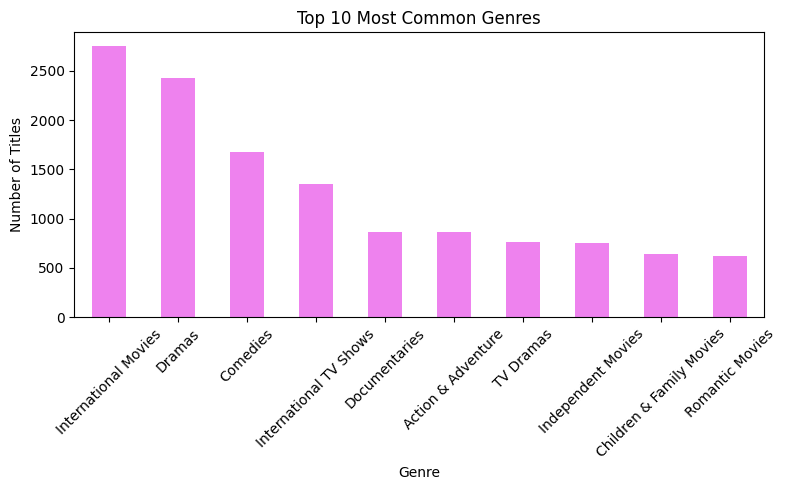

In [ ]:
# Split genres and count
genre_split = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genre_split.value_counts().head(10)

plt.figure(figsize=(8, 5))
top_genres.plot(kind='bar', color='violet')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
